# **Estudio Framingham de riesgo cardiovascular**

### **ABSTRACT**

Una pequeña ciudad en Massachusetts, Framingham, donde en 1948 un grupo de científicos decidió revelar los misterios del corazón humano. Así nació el Estudio de Framingham, una investigación que ha seguido a miles de personas a lo largo de tres generaciones, para relacionar datos y factores de riesgo con el fin de contribuir a la prevención de enfermedad cardiovascular (ECV).

En este estudio, nos sumergimos en los datos del Framingham Heart Study extraído de Kaggle, con el objetivo de descubrir patrones ocultos y relaciones significativas que puedan predecir ECV a 10 años. Comenzamos nuestro viaje con un Análisis Exploratorio de Datos (EDA), utilizando herramientas de visualización para dar luz a patrones ocultos y relaciones entre variables. Identificamos valores nulos y outliers, asegurándonos de que nuestros datos logren la mayor precisión y depuración posible para el buen funcionamiento de los modelos predictivos.

Nutridos del EDA, nos aventuramos en el mundo del machine learning. Probamos diferentes modelos, cada uno con su propio enfoque para resolver la predicción. Evaluamos su precisión y capacidad predictiva, buscando el modelo que pueda prever con mayor certeza quién está en riesgo de sufrir una enfermedad cardiovascular.

Los hallazgos de este estudio no solo nos acercan a comprender mejor los factores de riesgo, sino que también demuestran el poder de la inteligencia artificial en la medicina preventiva. Con cada predicción acertada, damos un paso más hacia un futuro donde las enfermedades del corazón puedan ser detectadas y tratadas a tiempo.

### **AUDIENCIA OBJETIVO**

El presente proyecto está destinado a los profesionales de la medicina cardiovascular, quienes podrían beneficiarse de la inteligencia artificial para predecir ECV y tomar acciones terapéuticas e higiénico - dietéticas para los pacientes con screening de riesgo. 

### **Key Features**

##### **Datos demográficos**: género, edad y nivel educativo.
##### **Indicadores de salud**: tabaquismo, presión arterial, niveles de colesterol, índice de masa corporal (BMI), y niveles de glucosa.
##### **Historia clínica**: prevalencia de ACV, hipertensión arterial, y diabetes.
##### **Variable target**: Riesgo de desarrollar ECV a 10 años
##### **Dataset metadata**: el dataset original cuenta 4240 registros x 16 campos (variables). Del total de registros, 582 presentan al menos un valor nulo. Se decide eliminar los registros con valores nulos, quedando un total de **3658 registros (13.72% de pérdida de registros)**. 


In [1]:
# Importo las primeras librerias que vamos a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://github.com/matisolica/Proyecto-final-DS2/raw/refs/heads/main/framingham_heart_study.csv'
df = pd.read_csv(data, sep=',') # Importo el dataset
df.head() # Mostrar las primeras 5 filas

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

### **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

In [3]:
df.shape # El dataset original tiene 4240 filas y 16 columnas

(4240, 16)

In [4]:
df.isnull().sum() # Verifico si hay valores nulos

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.dropna(inplace=True) # Elimino las filas con valores nulos
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
df.shape # Muestro la nueva cantidad de filas y columnas. Ahora tenemos 3658 filas y 16 columnas.

(3658, 16)

In [7]:
df.columns # Muestro el nombre de las columnas del df. El dataset tiene 16 columnas en total.

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.rename(columns={'male' : 'sex'}, inplace=True) # Cambio el nombre de la columna male por sex.

In [9]:
df.info() # Información del dataset

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


### Operacionalización de las variables

A continuación, se describen las variables incluídas en el dataset, con el fin de operacionalizar cada una y comprender su significado:

##### **sex**: describe el sexo de cada unidad de análisis. Un valor igual a 0 define un individuo de sexo femenino, mientras que 1 describe a un individuo de sexo masculino.
##### **age**: describe la edad de cada unidad de análisis.
##### **education**: describe la educación del individuo unidad de análisis, en un rango de 1 a 4. Si bien no encontré la descripción de la variable en la publicación de Kaggle ni en algunos notebooks explorados que utilizaron el mismo dataset, infiero desde un criterio de ponderación que 1 es el nivel educativo más bajo y 4 el más alto. 
##### **currentSmoker**: describe el hábito tabaquista de la unidad de análisis. 0 indica que no es tabaquista, mientras que 1 indica que sí lo es. 
##### **cigsPerDay**: describe la cantidad de cigarrillos por día que fuma el individuo unidad de análisis.
##### **BPMeds**: describe si la unidad de análisis toma medicamentos para control de la presión arterial. 0 indica que no toma medicamentos para controlar la presión arterial, 1 que sí los toma. 
##### **prevalentStroke**: indica si la unidad de análisis ha padecido algún evento de accidente cerebrovascular (ACV). 0 indica que no lo ha tenido, 1 indica que sí lo tuvo. 
##### **prevalentHyp**: indica si la unidad de análisis es hipertenso. 0 indica que no es hipertenso, 1 indica que sí lo es. 
##### **diabetes**: indica si la unidad de análisis es diabético. 0 indica que no es hipertenso, 1 indica que sí lo es.
##### **totChol**: indica los niveles de colesterol total dosado en análisis de laboratorio de cada unidad de análisis, en miligramos por decilitro (mg/dL). 
##### **sysBP**: indica la presión arterial sistólica de la unidad de análisis, en mmHg.
##### **diaBP**: indica la presión arterial diastólica de la unidad de análisis, en mmHg.
##### **BMI**: indica el índice de masa corporal de la unidad de análisis.
##### **heartRate**: indica la frecuencia cardiaca de la unidad de análisis, en latidos/minuto.
##### **glucose**: indica los niveles de glucosa en sangre de la unidad de análisis, en miligramos por decilitro (mg/dL)
##### **TenYearCHD**: indica la prevalencia a 10 años de desarrollar ECV. 0 indica que no ha desarrollado ECV, 1 indica que sí ha desarrollado. 

In [10]:
df.describe().T.round(2) # Resumen estadístico

count    mean    std     min     25%     50%     75%    max
sex              3658.0    0.44   0.50    0.00    0.00    0.00    1.00    1.0
age              3658.0   49.55   8.56   32.00   42.00   49.00   56.00   70.0
education        3658.0    1.98   1.02    1.00    1.00    2.00    3.00    4.0
currentSmoker    3658.0    0.49   0.50    0.00    0.00    0.00    1.00    1.0
cigsPerDay       3658.0    9.03  11.92    0.00    0.00    0.00   20.00   70.0
BPMeds           3658.0    0.03   0.17    0.00    0.00    0.00    0.00    1.0
prevalentStroke  3658.0    0.01   0.08    0.00    0.00    0.00    0.00    1.0
prevalentHyp     3658.0    0.31   0.46    0.00    0.00    0.00    1.00    1.0
diabetes         3658.0    0.03   0.16    0.00    0.00    0.00    0.00    1.0
totChol          3658.0  236.85  44.10  113.00  206.00  234.00  263.00  600.0
sysBP            3658.0  132.37  22.09   83.50  117.00  128.00  143.88  295.0
diaBP            3658.0   82.92  11.97   48.00   75.00   82.00   90.00  142.5
BMI              3658.0   25.78   4.07   15.54   23.08   25.38   28.04   56.8
heartRate        3658.0   75.73  11.98   44.00   68.00   75.00   82.00  143.0
glucose          3658.0   81.85  23.90   40.00   71.00   78.00   87.00  394.0
TenYearCHD       3658.0    0.15   0.36    0.00    0.00    0.00    0.00    1.0

### Primeros insights:

- La edad media es de 49.55 años, con una desviación estándar de 8.56 años
- Prevalencia de tabaquismo del 50%
- Prevalencia de hipertensión arterial del 31%, pero solo el 3% consume medicación para la hipertensión arterial. 
- Media de colesterol total de 236.85 mg/dL con una desviación estándar de 44.1 mg/dL, lo que evidencia un factor de riesgo significativamente presente en la muestra. (VN <200 mg/dL)
- La media de IMC es de 25.78, con una desviación estándar de 4.07, lo que evidencia una prevalencia de sobrepeso / obesidad significativa. Condice con el perfil epidemiológico de Estados Unidos. 

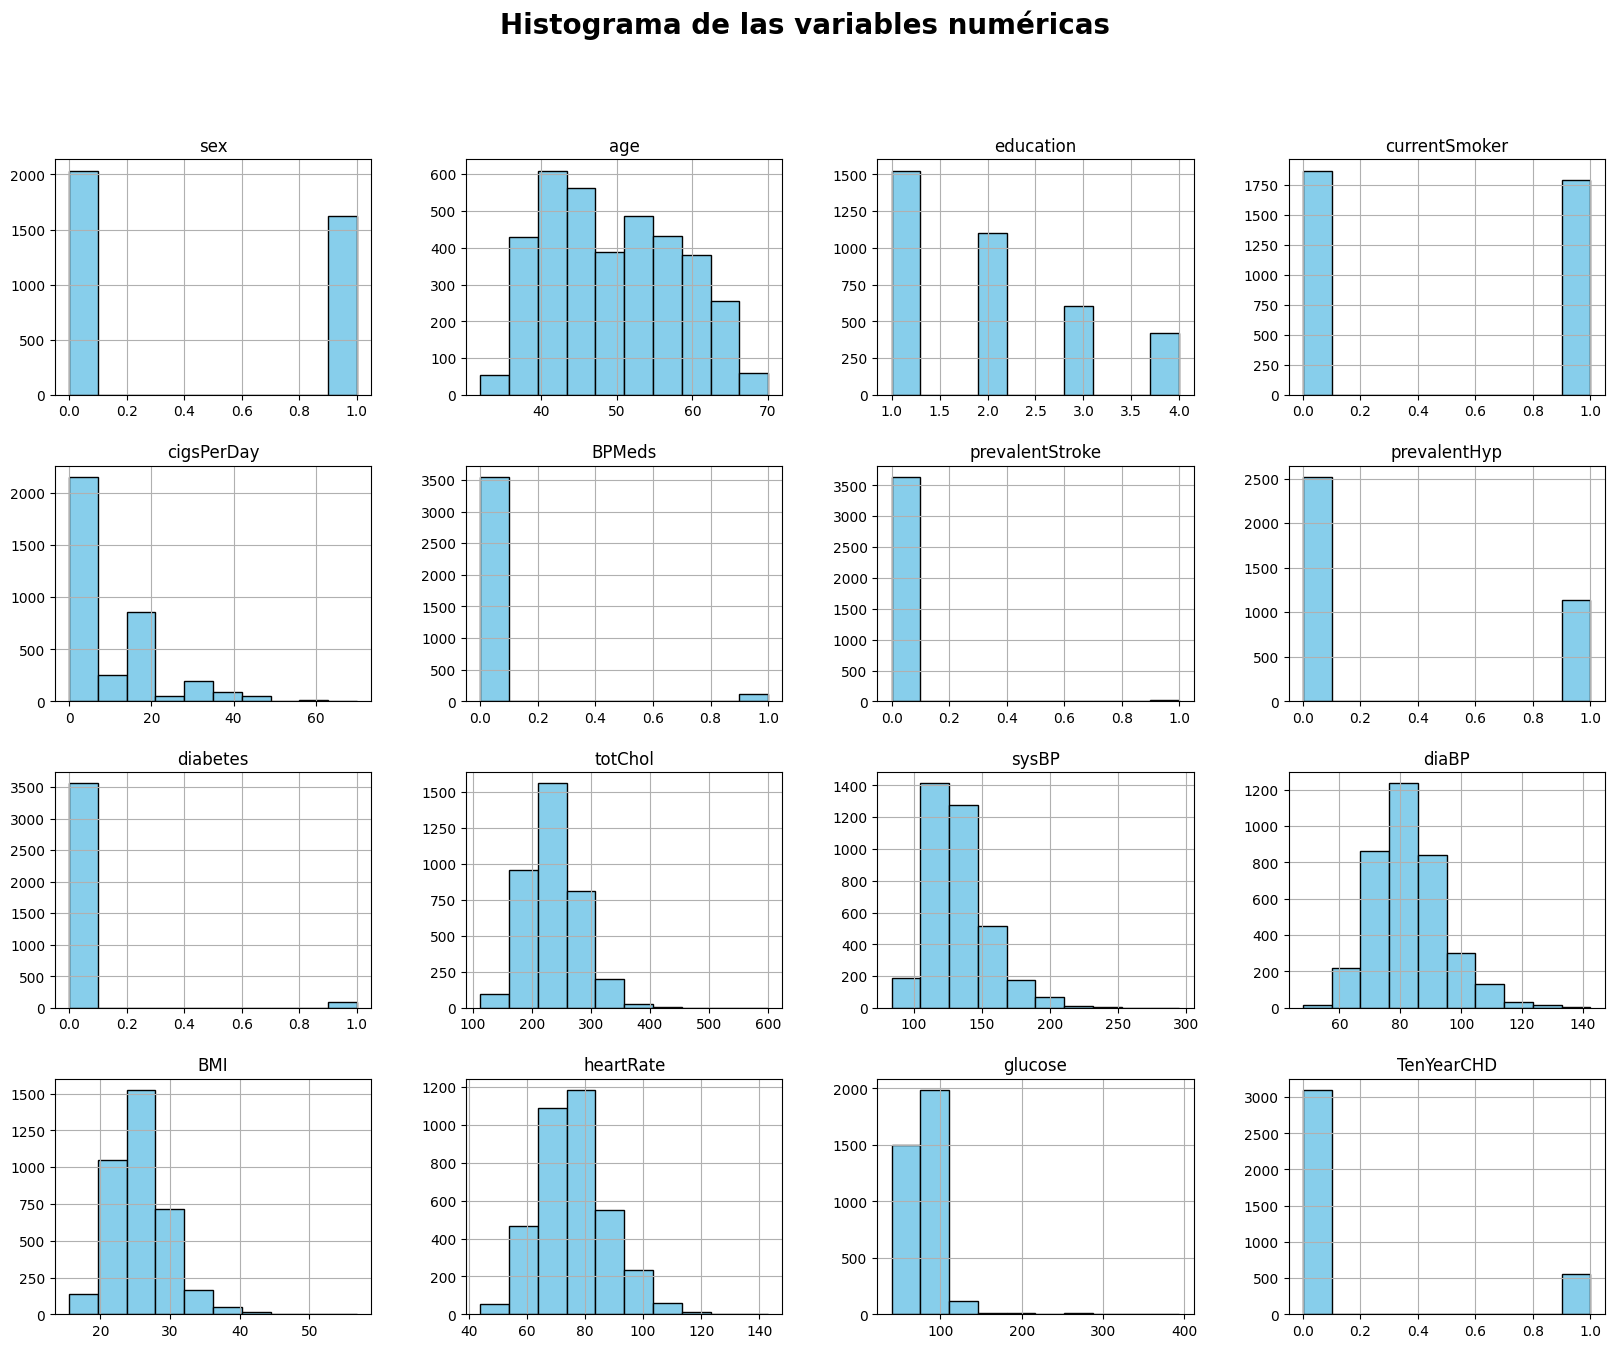

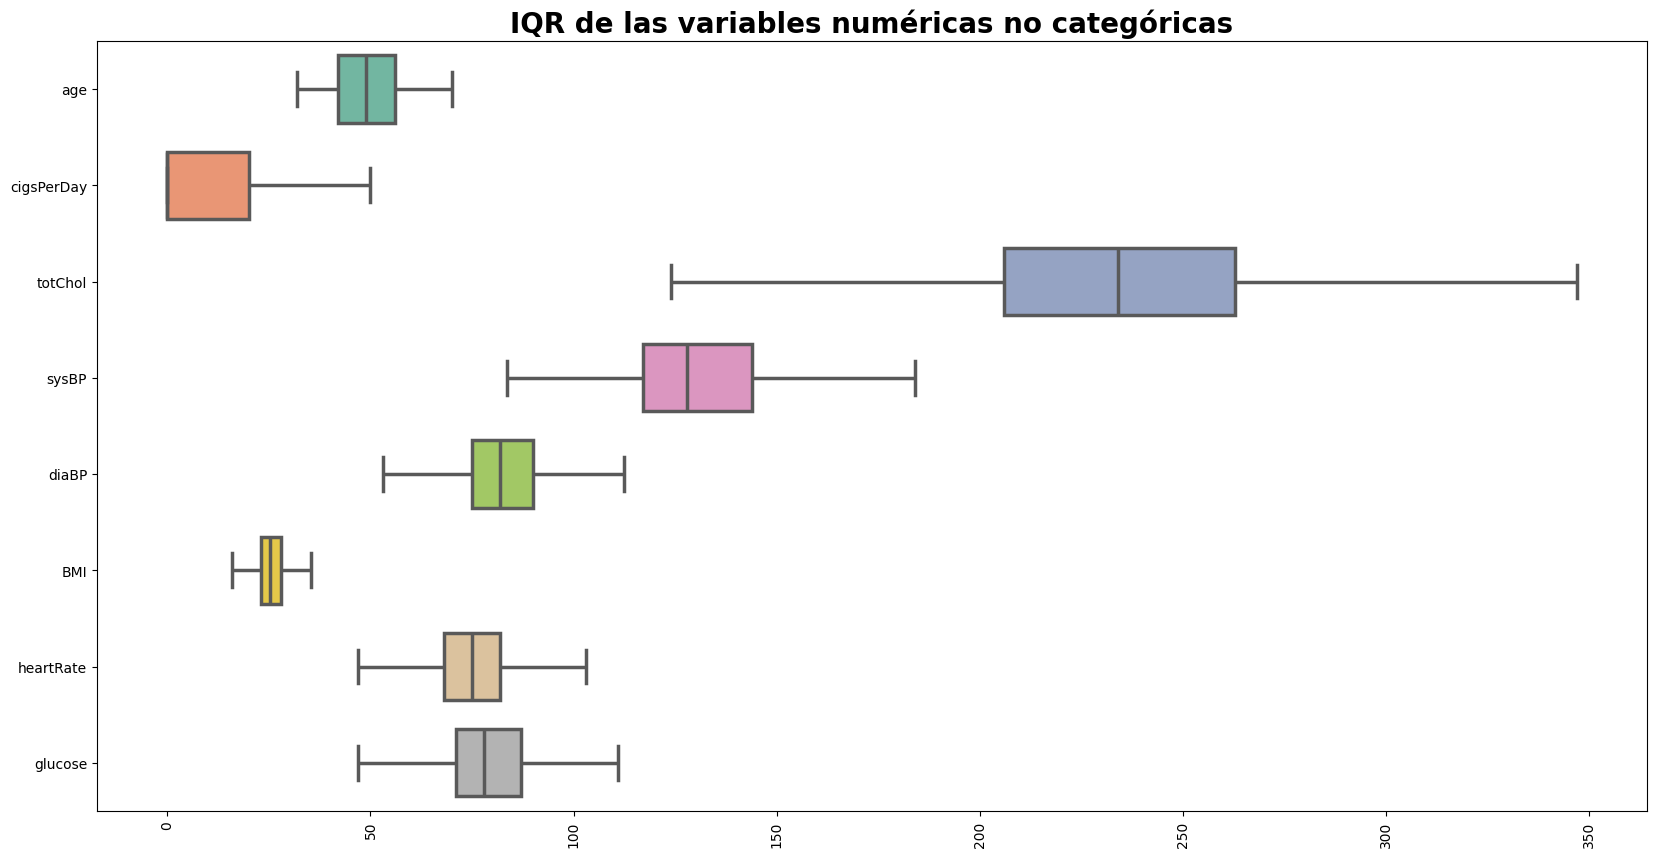

In [11]:
# Histograma de las variables numéricas
df.hist(bins=10, figsize=(20, 15), color='skyblue', ec='black')
plt.suptitle('Histograma de las variables numéricas', fontsize=20, fontweight='bold')

plt.show()

# Boxplot de las variables numéricas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']], orient='h', palette='Set2', linewidth=2.5, width=0.7, fliersize=10, showfliers=False)
plt.xticks(rotation=90)
plt.title('IQR de las variables numéricas no categóricas', fontsize=20, fontweight='bold')

plt.show()

### Insights:

- Edad: el IQR es bastante acotado, concentrandose alrededor de los 50 años +/- unos 6 años.
- Si bien la prevalencia de tabaquismo está en un 50%, la cantidad de cigarrillos por día se concentra en un rango de 0 a 7 (más de la mitad de la muestra).
- El IQR del colesterol total en sangre se encuentra por encima de los valores normales. Asimismo, la variación es muy amplia, lo que muestra variabilidad de los datos por fuera del IQR. 
- La mayor parte de Q3 de la presión arterial sistólica se encuentra por encima de los 130 mmHg, lo que respalda la conclusión de la prevalencia de la hipertensión arterial en la muestra de estudio. 
- El IQR del IMC es muy pequeño, y a su vez en un rango por encima de los valores normales, lo que refleja la prevalencia de sobrepeso/obesidad de la muestra de estudio. 

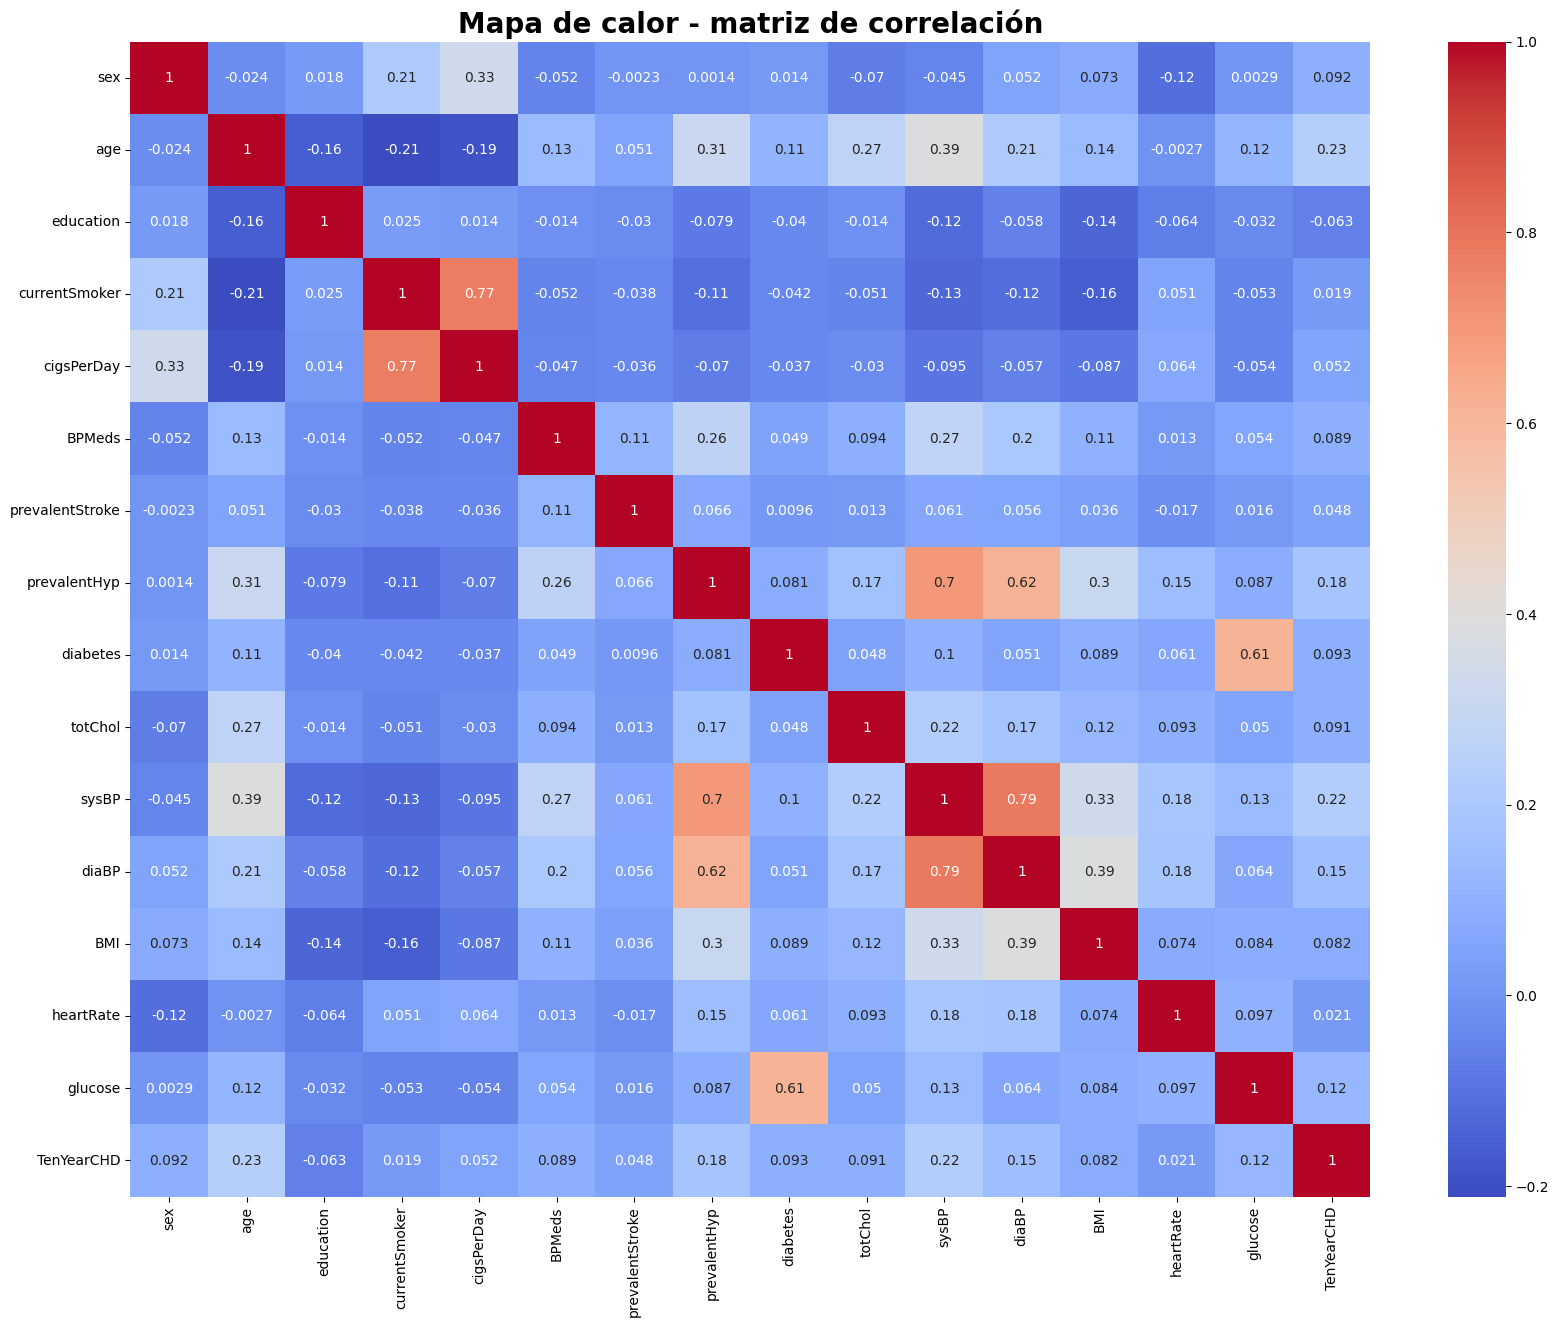

In [12]:
# Matriz de correlación
corr_matrix = df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor - matriz de correlación', fontsize=20, fontweight='bold')

plt.show()

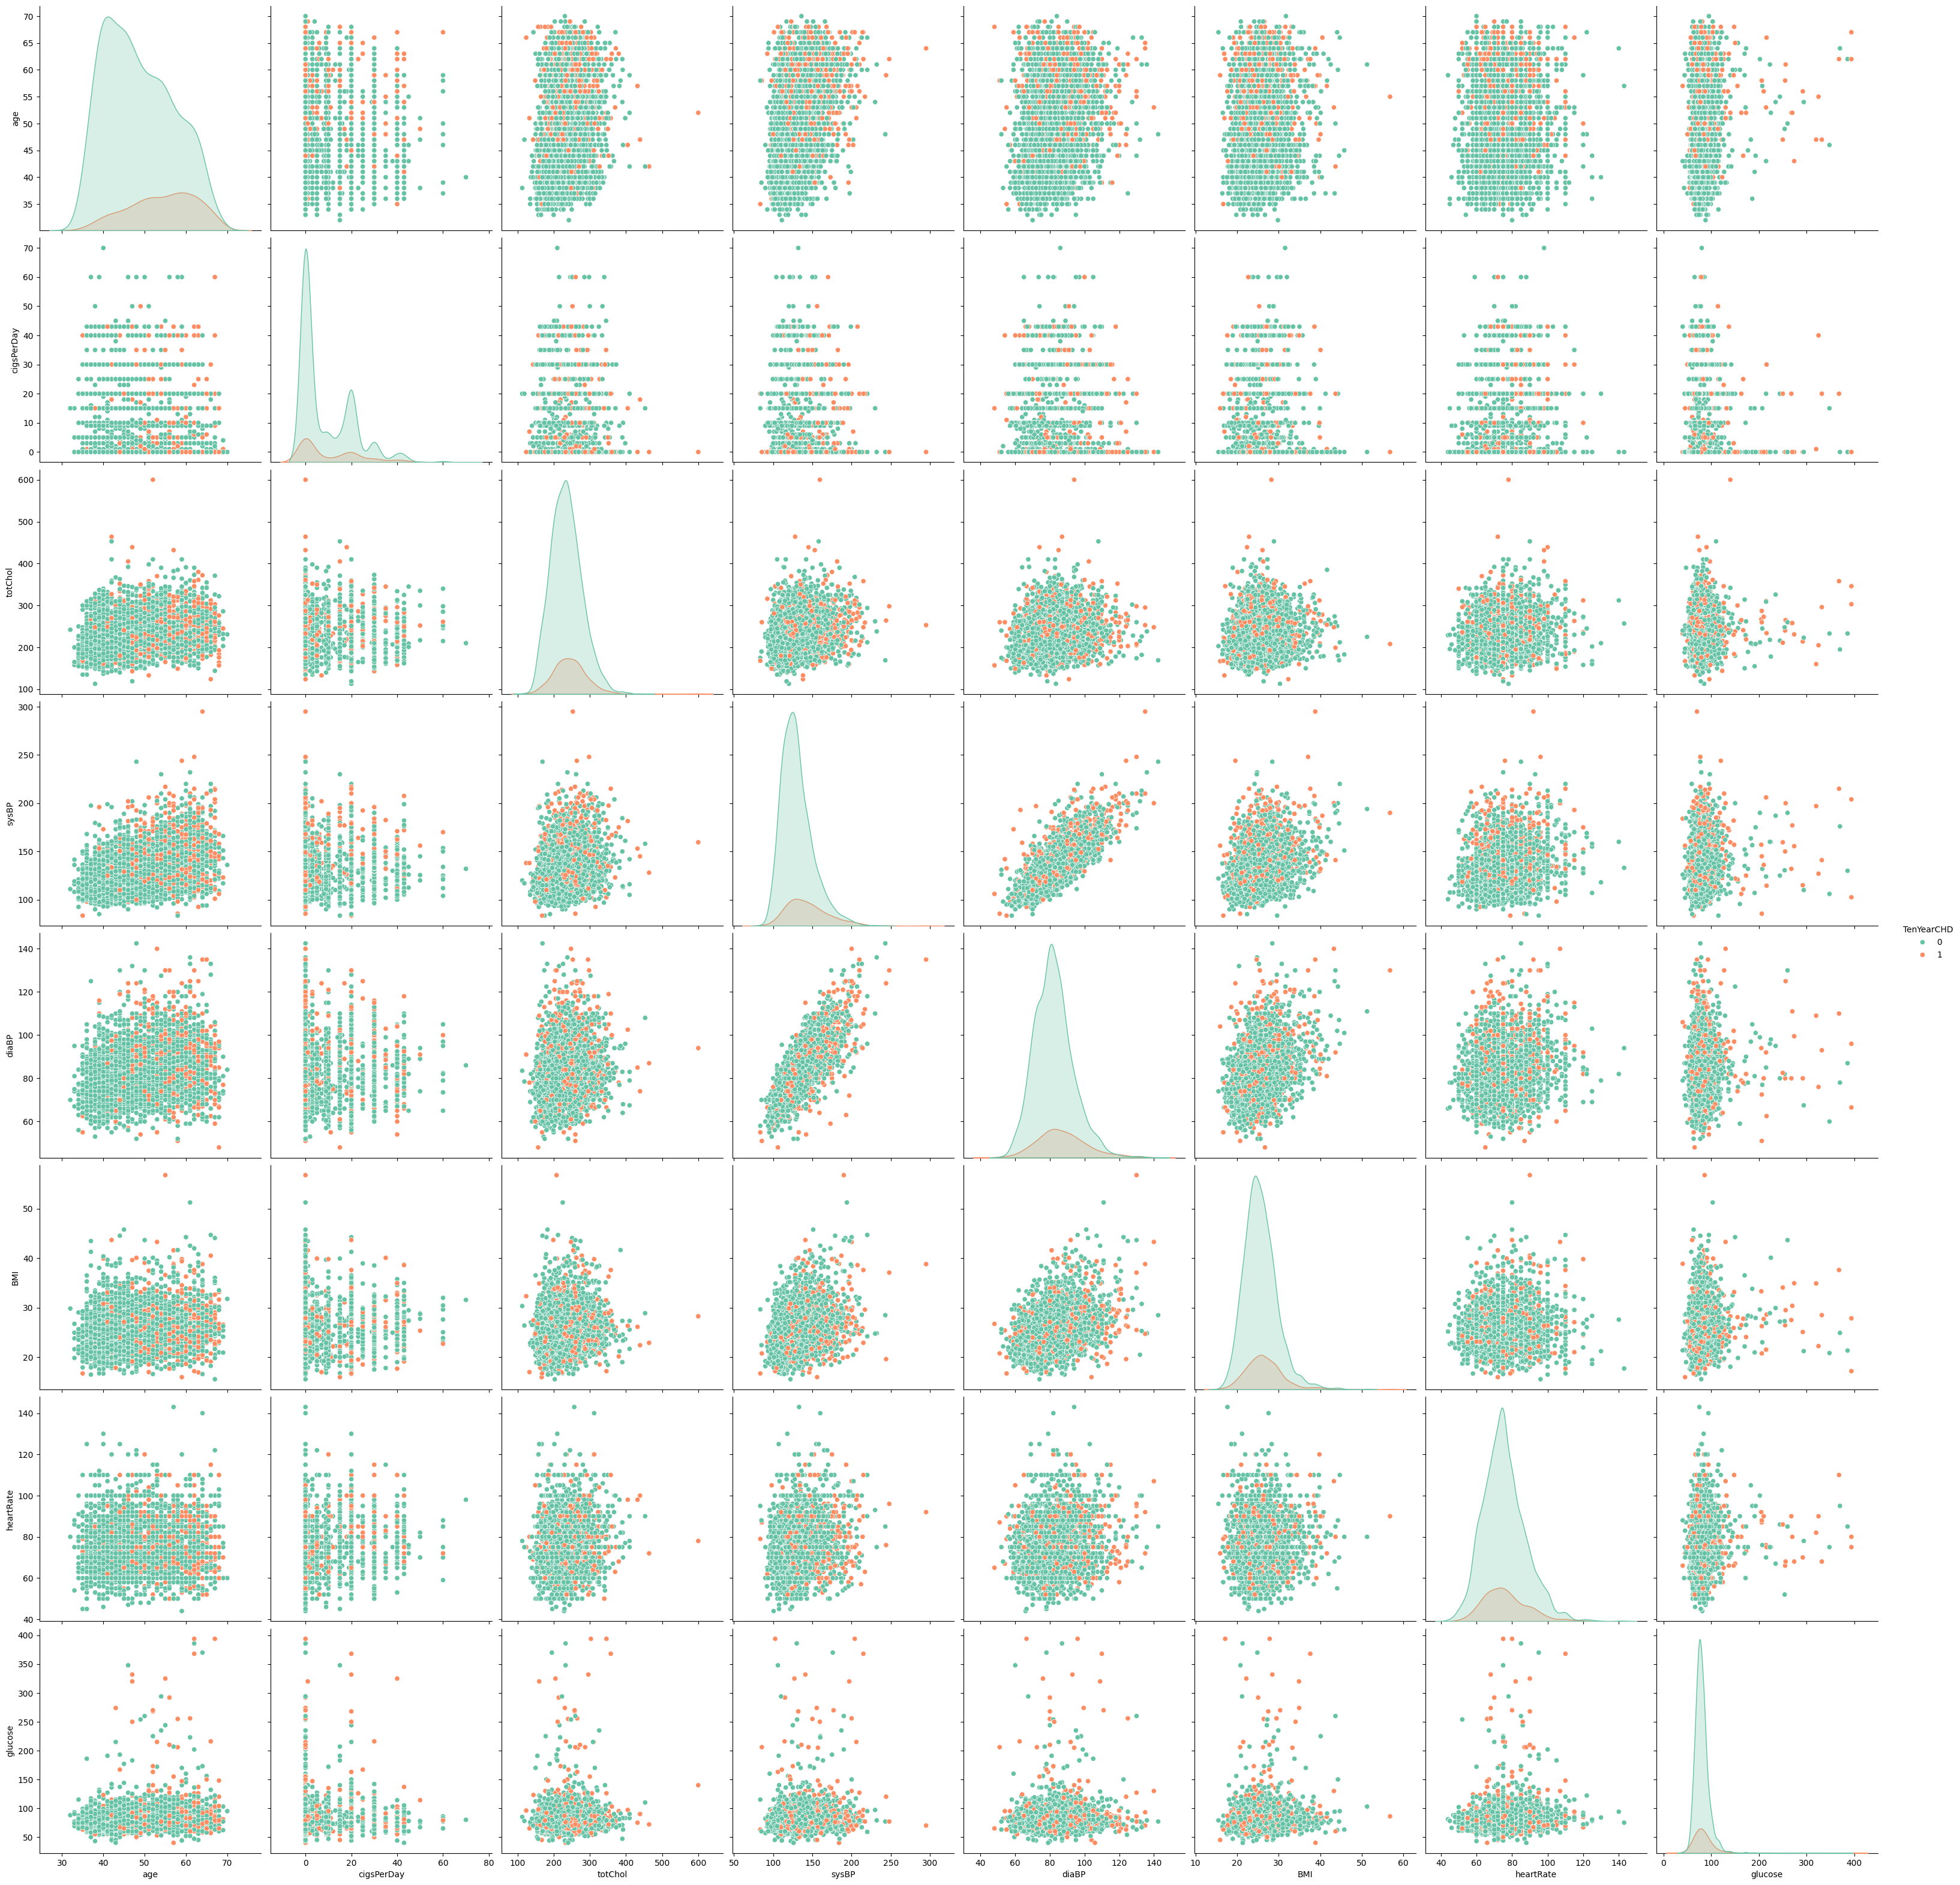

In [13]:
sns.pairplot(df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']], hue='TenYearCHD', height=4, palette='Set2')

### Insights:

- Edad: en la distribución de frecuencias por ECV a 10 años, se observa un incremento de la frecuencia de individuos que desarrollan ECV directamente proporcional a la edad, lo que podría sugerir una correlación positiva y un factor de riesgo para el desarrollo de ECV. 
- Correlación positiva fuerte entre la presión arterial sistólica y diastólica, lo que respalda la teoría médica sobre el tema. 
- Un menor nivel educativo podría estar relacionado con una mayor prevalencia de ECV. 

Con el objetivo de una mejor visualización y evidenciar la distribución normal de la muestra por grupos etarios, optimizo la visualización de los histogramas por rangos. 

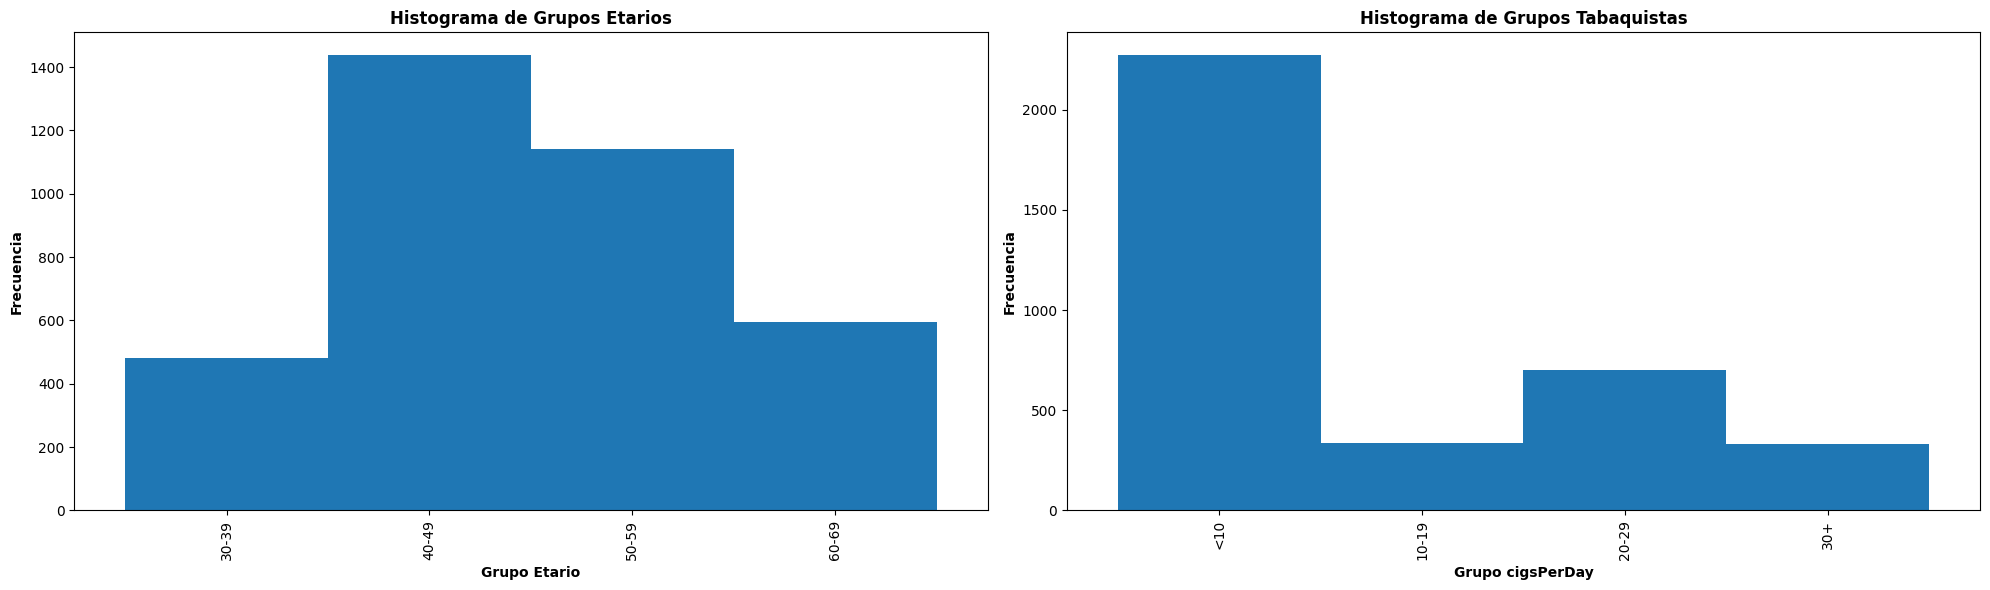

In [14]:
# Definir los rangos etarios y las etiquetas
age_bins = [30, 40, 50, 60, 70]
age_labels = ['30-39', '40-49', '50-59', '60-69']

# Crear una nueva columna para los grupos etarios
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Definir los rangos de cigarrillos diarios y las etiquetas
cigs_bins = [0, 10, 20, 30, 50]
cigs_labels = ['<10', '10-19', '20-29', '30+']

# Crear una nueva columna para los grupos de cigarrillos diarios
df['cigs_group'] = pd.cut(df['cigsPerDay'], bins=cigs_bins, labels=cigs_labels, right=False)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Graficar el histograma para los grupos etarios
df['age_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[0]) #sort es false porque no queremos que ordene los valores por frecuencia, sino por los rangos etarios
axes[0].set_xlabel('Grupo Etario', fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontweight='bold')
axes[0].set_title('Histograma de Grupos Etarios', fontweight='bold')

# Graficar el histograma para los grupos de cigarrillos diarios
df['cigs_group'].value_counts(sort=False).plot(kind='bar', width=1, ax=axes[1])
axes[1].set_xlabel('Grupo cigsPerDay', fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontweight='bold')
axes[1].set_title('Histograma de Grupos Tabaquistas', fontweight='bold')

plt.tight_layout()
plt.show()

### **Hipertensión arterial**

La hipertensión arterial (HTA) es una condición en la que la presión de la sangre en las arterias es persistentemente alta. Esta presión elevada, al incrementar la postcarga y las resistencias vasculares, lleva al miocardio a tener que realizar mayor esfuerzo para vencerlas y poder eyectar la sangre, lo que puede llevar a una serie de complicaciones de salud.

#### **La HTA como Factor de Riesgo**
La hipertensión arterial es uno de los principales factores de riesgo para el desarrollo de enfermedades cardiovasculares. Puede causar daño a las arterias, lo que lleva a la aterosclerosis (endurecimiento y estrechamiento de las arterias), aumentando el riesgo de infarto de miocardio, insuficiencia cardíaca, accidente cerebrovascular y enfermedad renal. Además, la hipertensión puede provocar hipertrofia ventricular izquierda, una condición en la que el músculo del corazón se engrosa y se vuelve menos eficiente.

#### **Valores de Tensión Arterial**
Los valores de tensión arterial se clasifican de la siguiente manera:

**Tensión arterial normal:**

Sistólica (máxima): Menos de 120 mm Hg
Diastólica (mínima): Menos de 80 mm Hg

**Hipertensión:**

**Grado 1:**
Sistólica: 130-139 mm Hg
Diastólica: 80-89 mm Hg
**Grado 2:**
Sistólica: 140-179 mm Hg
Diastólica: 90-119 mm Hg

**Crisis hipertensiva:**

**Urgencia hipertensiva:**
Sistólica: 180 mm Hg o más
Diastólica: 120 mm Hg o más, sin daño agudo a órganos
**Emergencia hipertensiva:**
Sistólica: 180 mm Hg o más
Diastólica: 120 mm Hg o más, con daño agudo a órganos4.

In [15]:
# Definir la función de clasificación para sysBP
def class_sysBP(val):
    if val < 130:
        return 'normal'
    elif 130 <= val <= 179:
        return 'HTA'
    else:
        return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['sysBP_class'] = df['sysBP'].apply(class_sysBP)

# Contar la cantidad de registros por clase
sysBP_df = df[['sysBP', 'sysBP_class']].groupby('sysBP_class').count()

# Ordenar los valores por 'normal', 'HTA' y 'HTA_Crisis'
order = ['normal', 'HTA', 'HTA_Crisis']
sysBP_df = sysBP_df.reindex(order)

# Mostrar el DataFrame ordenado
sysBP_df

sysBP
sysBP_class       
normal        1919
HTA           1592
HTA_Crisis     147

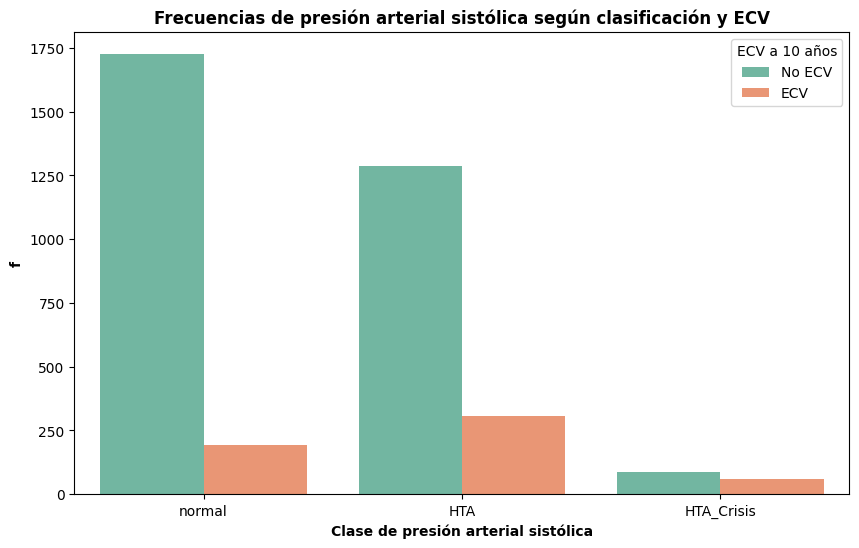

In [16]:
# Definir la función de clasificación para sysBP
def class_sysBP(val):
	if val < 130:
		return 'normal'
	elif 130 <= val <= 179:
		return 'HTA'
	else:
		return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['sysBP_class'] = df['sysBP'].apply(class_sysBP)

plt.figure(figsize=(10, 6))

# Graficar el conteo de registros por clase, hue por TenYearCHD
sns.countplot(data=df, x='sysBP_class', hue='TenYearCHD', palette='Set2')

plt.xlabel('Clase de presión arterial sistólica', fontweight='bold')
plt.ylabel('f', fontweight='bold')
plt.title('Frecuencias de presión arterial sistólica según clasificación y ECV', fontweight='bold')
plt.legend(['No ECV', 'ECV'], title='ECV a 10 años', title_fontsize='10', loc='upper right')
plt.show()


### Insights:

Se observa que la brecha existente entre los que desarrollan ECV y los que no lo hacen se reduce significativamente conforme se progresa en la definición de HTA. Otro gráfico que evidencia a la HTA como un predictor de ECV a 10 años, y un factor de riesgo. 

In [17]:
# Definir la función de clasificación para diaBP
def class_diaBP(val):
    if val < 80:
        return 'normal'
    elif 80 <= val <= 109:
        return 'HTA'
    else:
        return 'HTA_Crisis'

# Crear una nueva columna para las clases basadas en los valores de sysBP
df['diaBP_class'] = df['diaBP'].apply(class_diaBP)

# Contar la cantidad de registros por clase
diaBP_df = df[['diaBP', 'diaBP_class']].groupby('diaBP_class').count()

# Ordenar los valores por 'normal', 'HTA' y 'HTA_Crisis'
order = ['normal', 'HTA', 'HTA_Crisis']
diaBP_df = diaBP_df.reindex(order)

# Mostrar el DataFrame ordenado
diaBP_df

diaBP
diaBP_class       
normal        1437
HTA           2122
HTA_Crisis      99

In [18]:
BP_df = pd.concat([sysBP_df, diaBP_df], axis=1)
BP_df


sysBP  diaBP
normal       1919   1437
HTA          1592   2122
HTA_Crisis    147     99

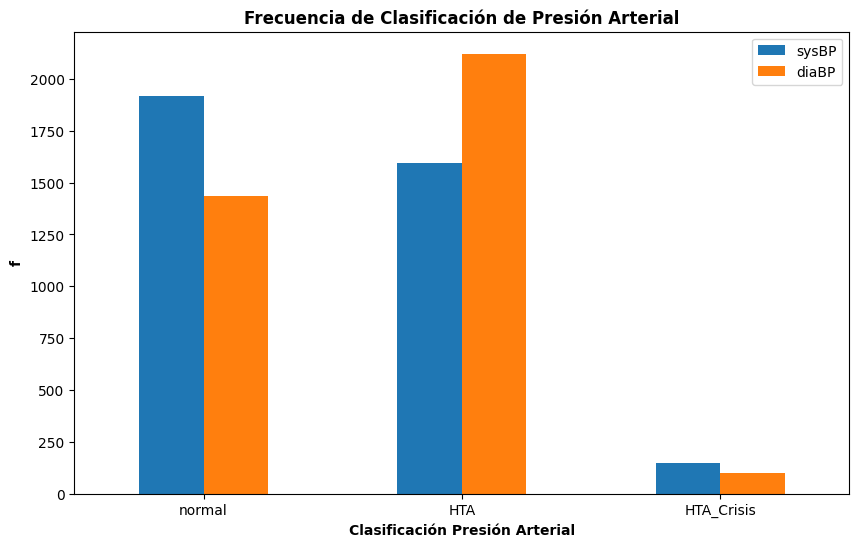

In [19]:
# Crear gráfico de barras combinadas
BP_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Clasificación Presión Arterial', fontweight='bold')
plt.ylabel('f', fontweight='bold')
plt.title('Frecuencia de Clasificación de Presión Arterial', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [20]:
countCHD = df['TenYearCHD'].value_counts()
countCHD

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

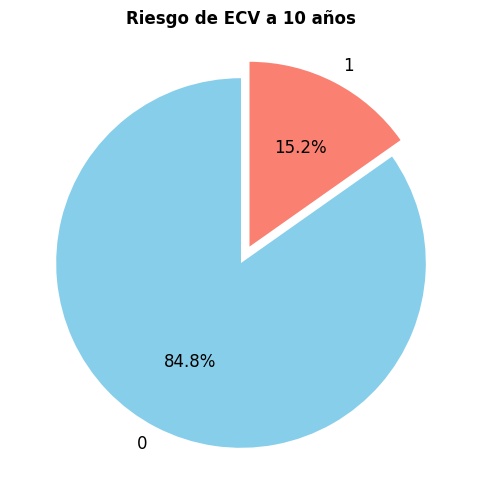

In [21]:
plt.figure(figsize=(10, 6))
plt.pie(countCHD, labels=countCHD.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode=(0, 0.1), textprops={'fontsize': 12})
plt.title('Riesgo de ECV a 10 años', fontweight='bold')


plt.show()

Sobre el total de la muestra, el 15.2% de los individuos han desarrollado ECV en el periodo de estudio (f=557)

### Modelado Machine Learning

In [22]:
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD age_group cigs_group sysBP_class diaBP_class  
0           0     30-39        <10      normal      normal  
1           0     40-49        <10      normal         HTA  
2           0     40-49      20-29      normal         HTA  
3           1     60-69        30+         HTA         HTA  
4           0     40-49      20-29         HTA         HTA

In [23]:
df = df.drop(['age_group', 'cigs_group', 'sysBP_class', 'diaBP_class'], axis=1)
df.head()

sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

Dado que los datos están en diferentes escalas (categóricas, frecuencias, mmHg, mg/dL, latidos por minuto) realizo normalización de los datos con el parámetro StandardScaler. El objetivo es mejorar el rendimiento de los modelos predictivos y la comparabilidad. 

In [24]:
from sklearn.preprocessing import StandardScaler

# Normalización de las variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [25]:
from sklearn.model_selection import train_test_split

# División del dataset entre las variables independientes y la variable dependiente
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Importo las librerías de los modelos de clasificación

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Entrenamiento y predicción de los modelos

# Regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Árbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión logística:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.75      0.02      0.03       176

    accuracy                           0.84      1098
   macro avg       0.80      0.51      0.47      1098
weighted avg       0.83      0.84      0.77      1098

Árbol de decisión:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       922
           1       0.24      0.25      0.25       176

    accuracy                           0.76      1098
   macro avg       0.55      0.55      0.55      1098
weighted avg       0.76      0.76      0.76      1098

Random Forest:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       922
           1       0.85      0.06      0.12       176

    accuracy                           0.85      1098
   macro avg       0.85      0.53      0.52      1098
weighted avg    

Conforme a los resultados, se observa que si bien predice correctamente los valores negativos (0), no lo hace con los valores positivos (1), con lo cual no estaría prediciendo correctamente el riesgo de desarrollo de ECV. Esto se debe a que no está balanceada la muestra para ambos casos. 
Para corregirlo, incorporamos en los tres modelos el balanceo de la muestra:

In [45]:
# Muestro desbalance de la muestra
countCHD

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [27]:
# Regresión logística
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
tree_des = DecisionTreeClassifier(class_weight='balanced')
tree_des.fit(X_train, y_train)
y_pred_tree = tree_des.predict(X_test)
print("Árbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier(class_weight='balanced')
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Regresión logística:
               precision    recall  f1-score   support

           0       0.91      0.66      0.77       922
           1       0.28      0.68      0.39       176

    accuracy                           0.66      1098
   macro avg       0.60      0.67      0.58      1098
weighted avg       0.81      0.66      0.71      1098

Árbol de decisión:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       922
           1       0.26      0.22      0.23       176

    accuracy                           0.77      1098
   macro avg       0.55      0.55      0.55      1098
weighted avg       0.76      0.77      0.77      1098



C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.83      0.03      0.05       176

    accuracy                           0.84      1098
   macro avg       0.84      0.51      0.48      1098
weighted avg       0.84      0.84      0.78      1098



El único cambio significativo observado es la mejora de la sensibilidad del modelo de regresión logística para los valores = 1, pero en detrimento de la precisión. A pesar de utilizar el parametro class_weight='balanced', no se logra optimizar los modelos utilizados. Se procede a utilizar SMOTE, de la librería imblearn, una técnica de sobremuestreo utilizada para abordar el problema del desbalanceo de clases en conjuntos de datos. Esta estrategia me permitirá mejorar el rendimiento de los modelos, evitar el sobreajuste, y equilibrar las clases 0 y 1. 

In [28]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vuelvo a entrenar y testear los modelos
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('Regresión logística (SMOTE):\n', classification_report(y_test, y_pred))

tree_des = DecisionTreeClassifier(class_weight='balanced')
tree_des.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree_des.predict(X_test)
print("Árbol de decisión (SMOTE):\n", classification_report(y_test, y_pred_tree))

forest_clf = RandomForestClassifier(class_weight='balanced')
forest_clf.fit(X_train_resampled, y_train_resampled)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest (SMOTE):\n", classification_report(y_test, y_pred_forest))

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión logística (SMOTE):
               precision    recall  f1-score   support

           0       0.89      0.62      0.73       922
           1       0.23      0.59      0.33       176

    accuracy                           0.62      1098
   macro avg       0.56      0.61      0.53      1098
weighted avg       0.78      0.62      0.67      1098

Árbol de decisión (SMOTE):
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       922
           1       0.22      0.26      0.24       176

    accuracy                           0.73      1098
   macro avg       0.54      0.54      0.54      1098
weighted avg       0.75      0.73      0.74      1098

Random Forest (SMOTE):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       922
           1       0.33      0.15      0.21       176

    accuracy                           0.81      1098
   macro avg       0.59      0.55      0.55   

C:\Users\matis\AppData\Local\Temp\ipykernel_10860\4073805057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelos', y='Eficacia', data=accuracy_df, palette='viridis')


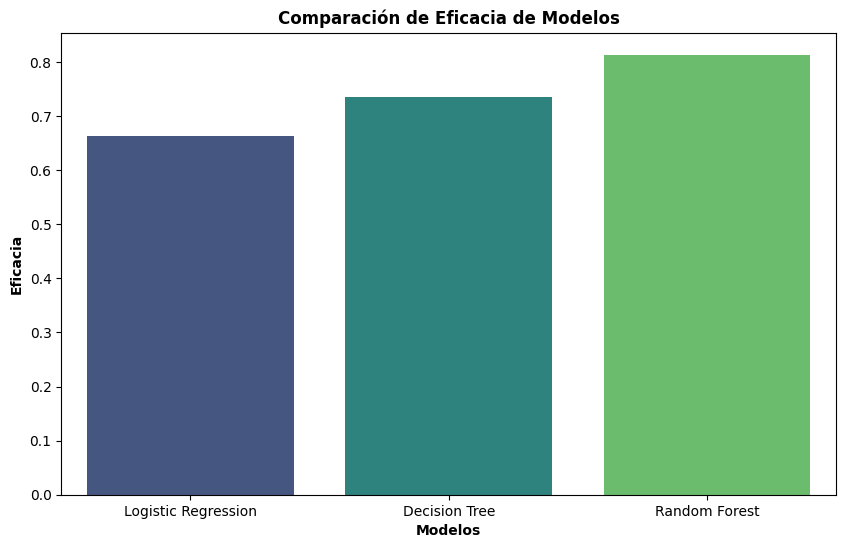

In [29]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)

# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Modelos': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Eficacia': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelos', y='Eficacia', data=accuracy_df, palette='viridis')
plt.xlabel('Modelos', fontweight='bold')
plt.ylabel('Eficacia', fontweight='bold')
plt.title('Comparación de Eficacia de Modelos', fontweight='bold')
plt.show()

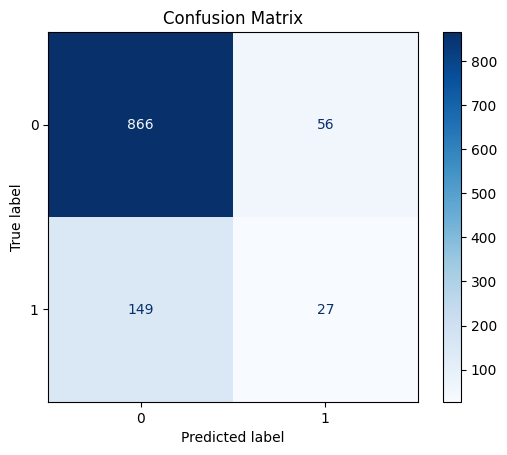

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_forest)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Importancia de las variables en el modelo Random Forest
importances = forest_clf.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importancia': importances})
feature_importances = feature_importances.sort_values(by='Importancia', ascending=False).round(2)
print(feature_importances)

            Feature  Importancia
2         education         0.14
1               age         0.13
10            sysBP         0.12
9           totChol         0.10
14          glucose         0.09
13        heartRate         0.09
11            diaBP         0.09
12              BMI         0.09
4        cigsPerDay         0.07
3     currentSmoker         0.02
5            BPMeds         0.02
0               sex         0.02
7      prevalentHyp         0.01
8          diabetes         0.00
6   prevalentStroke         0.00


In [32]:
# Inicializar modelos
svm = SVC(class_weight='balanced')
knn = KNeighborsClassifier()

# Entrenar y evaluar SVM
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Entrenar y evaluar KNN
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)


C:\Users\matis\AppData\Local\Temp\ipykernel_10860\366191132.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',


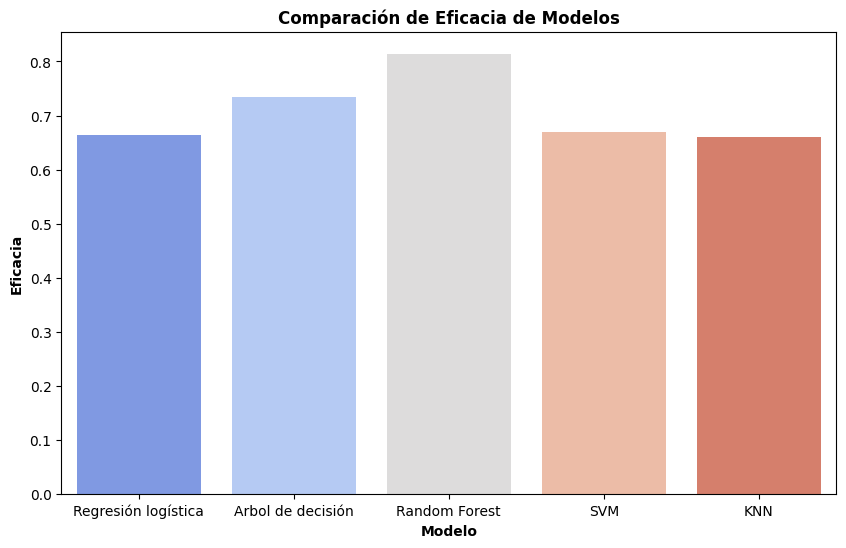

In [33]:
# Crear un DataFrame con las precisiones de los modelos
accuracy_df = pd.DataFrame({
    'Model': ['Regresión logística', 'Arbol de decisión', 'Random Forest','SVM', 'KNN'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy, knn_accuracy]
})

# Graficar el barplot comparando las precisiones de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', 
            y='Accuracy',
            palette='coolwarm',
            data=accuracy_df)
plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('Eficacia', fontweight='bold')
plt.title('Comparación de Eficacia de Modelos', fontweight='bold')

plt.show()

In [34]:
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df

Model  Accuracy
2        Random Forest  0.813297
1    Arbol de decisión  0.734973
3                  SVM  0.670310
0  Regresión logística  0.663934
4                  KNN  0.660291

In [35]:
# Regresión logística
print("Regresión logística:\n", classification_report(y_test, y_pred_log_reg))

# Árbol de decisión
print("Arbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Random Forest
print("Random Forest:\n", classification_report(y_test, y_pred_forest))


Regresión logística:
               precision    recall  f1-score   support

           0       0.91      0.66      0.77       922
           1       0.28      0.68      0.39       176

    accuracy                           0.66      1098
   macro avg       0.60      0.67      0.58      1098
weighted avg       0.81      0.66      0.71      1098

Arbol de decisión:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       922
           1       0.22      0.26      0.24       176

    accuracy                           0.73      1098
   macro avg       0.54      0.54      0.54      1098
weighted avg       0.75      0.73      0.74      1098

Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       922
           1       0.33      0.15      0.21       176

    accuracy                           0.81      1098
   macro avg       0.59      0.55      0.55      1098
weighted avg    

In [36]:
# SVM
print("SVM:\n", classification_report(y_test, y_pred_svm))

# KNN
print("KNN:\n", classification_report(y_test, y_pred_knn))

SVM:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77       922
           1       0.29      0.71      0.41       176

    accuracy                           0.67      1098
   macro avg       0.60      0.69      0.59      1098
weighted avg       0.82      0.67      0.71      1098

KNN:
               precision    recall  f1-score   support

           0       0.87      0.70      0.78       922
           1       0.22      0.45      0.30       176

    accuracy                           0.66      1098
   macro avg       0.55      0.57      0.54      1098
weighted avg       0.77      0.66      0.70      1098



No se obtuvieron diferencias significativas con SMOTE. Utilizaremos otra tecnica de sobremuestreo de la libreria imblearn llamada ADASYN. A diferencia de SMOTE, ADASYN adapta la generación de muestras sintéticas en función de la densidad de las muestras minoritarias, generando más muestras en áreas donde la densidad es baja y menos donde es alta.

In [37]:
from imblearn.over_sampling import ADASYN

# Aplicar ADASYN al conjunto de entrenamiento
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [38]:
# Entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predecir y evaluar
y_pred = model.predict(X_test)
print('Regresión logística:\n', classification_report(y_test, y_pred))

# Árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_resampled, y_train_resampled)
y_pred_forest = forest_clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_forest))

Regresión logística:
               precision    recall  f1-score   support

           0       0.88      0.63      0.74       922
           1       0.23      0.57      0.33       176

    accuracy                           0.62      1098
   macro avg       0.56      0.60      0.53      1098
weighted avg       0.78      0.62      0.67      1098

Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       922
           1       0.23      0.32      0.27       176

    accuracy                           0.72      1098
   macro avg       0.55      0.56      0.55      1098
weighted avg       0.76      0.72      0.74      1098



C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       922
           1       0.38      0.15      0.22       176

    accuracy                           0.82      1098
   macro avg       0.62      0.55      0.56      1098
weighted avg       0.78      0.82      0.79      1098



In [39]:
# Inicializar modelos
svm = SVC()
knn = KNeighborsClassifier()

# Entrenar y evaluar SVM
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Entrenar y evaluar KNN
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [40]:
# SVM
print("SVM:\n", classification_report(y_test, y_pred_svm))

# KNN
print("KNN:\n", classification_report(y_test, y_pred_knn))

SVM:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74       922
           1       0.27      0.75      0.40       176

    accuracy                           0.64      1098
   macro avg       0.60      0.68      0.57      1098
weighted avg       0.82      0.64      0.69      1098

KNN:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75       922
           1       0.20      0.44      0.28       176

    accuracy                           0.63      1098
   macro avg       0.53      0.56      0.52      1098
weighted avg       0.76      0.63      0.68      1098



### Preparacion de las variables para graficar los resultados de los modelos

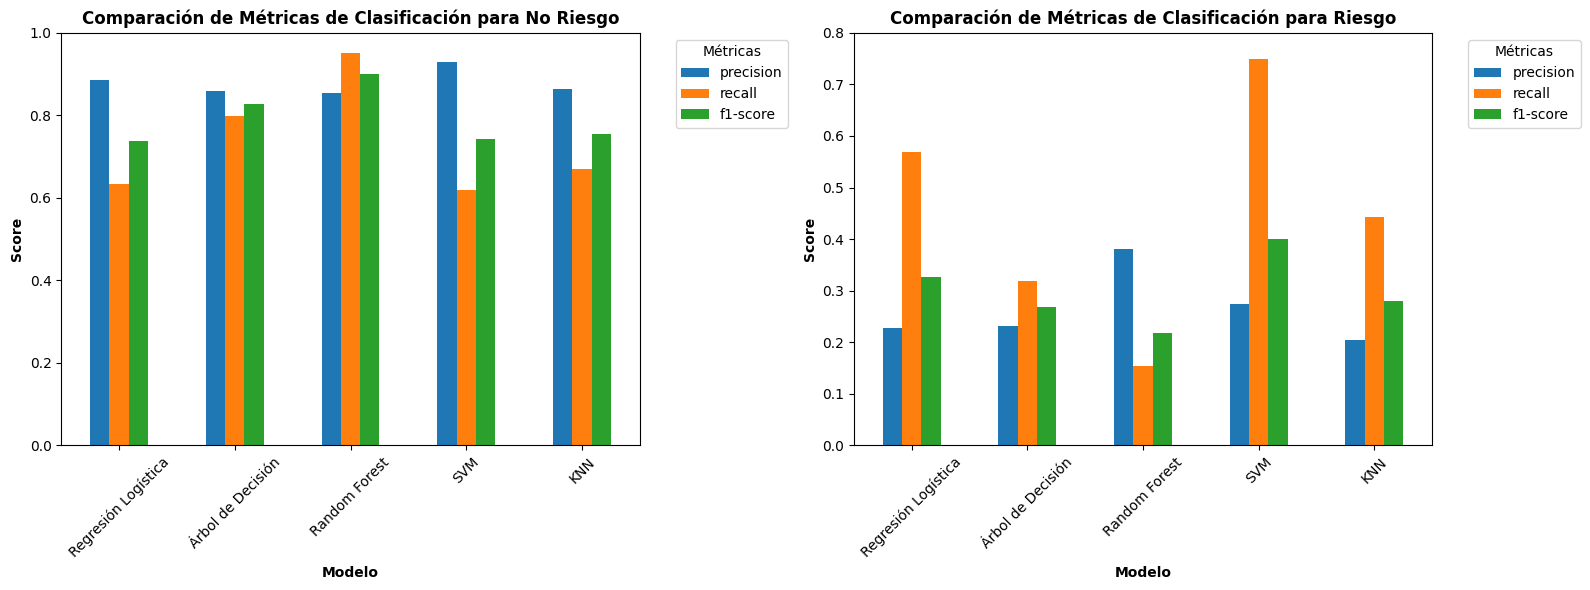

In [41]:
# Generar los reportes de clasificación
report_RL = classification_report(y_test, y_pred, output_dict=True)
report_arbol = classification_report(y_test, y_pred_tree, output_dict=True)
report_forest = classification_report(y_test, y_pred_forest, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Convertir los reportes a DataFrames
df_report_RL = pd.DataFrame(report_RL).transpose()
df_report_arbol = pd.DataFrame(report_arbol).transpose()
df_report_forest = pd.DataFrame(report_forest).transpose()
df_report_svm = pd.DataFrame(report_svm).transpose()
df_report_knn = pd.DataFrame(report_knn).transpose()

# Filtrar solo las clases 0 y 1 y renombrar
df_filtered_RL = df_report_RL.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_arbol = df_report_arbol.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_forest = df_report_forest.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_svm = df_report_svm.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})
df_filtered_knn = df_report_knn.loc[['0', '1'], ['precision', 'recall', 'f1-score']].rename(index={'0': 'No riesgo', '1': 'Riesgo'})

# Añadir una columna para identificar el modelo
df_filtered_RL['Modelo'] = 'Regresión Logística'
df_filtered_arbol['Modelo'] = 'Árbol de Decisión'
df_filtered_forest['Modelo'] = 'Random Forest'
df_filtered_svm['Modelo'] = 'SVM'
df_filtered_knn['Modelo'] = 'KNN'

# Combinar todos los DataFrames
df_combined = pd.concat([df_filtered_RL, df_filtered_arbol, df_filtered_forest, df_filtered_svm, df_filtered_knn])

# Resetear el índice para facilitar el gráfico
df_combined.reset_index(inplace=True)

# Crear una columna combinada para el índice
df_combined['Clase_Modelo'] = df_combined['index'] + ' (' + df_combined['Modelo'] + ')'

# Filtrar los datos para "No Riesgo" y "Riesgo"
df_no_riesgo = df_combined[df_combined['index'] == 'No riesgo']
df_riesgo = df_combined[df_combined['index'] == 'Riesgo']

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico para "No Riesgo"
df_no_riesgo.set_index('Clase_Modelo')[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Comparación de Métricas de Clasificación para No Riesgo', fontweight='bold')
axes[0].set_xlabel('Modelo', fontweight='bold')
axes[0].set_xticklabels(df_no_riesgo['Modelo'], rotation=45)
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_ylim(0, 1)

# Gráfico para "Riesgo"
df_riesgo.set_index('Clase_Modelo')[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Comparación de Métricas de Clasificación para Riesgo', fontweight='bold')
axes[1].set_xlabel('Modelo', fontweight='bold')
axes[1].set_xticklabels(df_riesgo['Modelo'], rotation=45)
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_ylim(0, 0.8)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [42]:
# Crear un DataFrame con los reportes de clasificación de todos los modelos utilizados y mejorados

df_combined1 = pd.concat([df_report_RL, df_report_arbol, df_report_forest, df_report_svm, df_report_knn], keys=['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'SVM', 'KNN'])
df_combined1.drop(columns=['support'], inplace=True)   # Eliminar la columna 'support'
print('Rendimiento de modelos:\n', df_combined1)


Rendimiento de modelos:
                                   precision    recall  f1-score
Regresión Logística 0              0.884848  0.633406  0.738306
                    1              0.228311  0.568182  0.325733
                    accuracy       0.622951  0.622951  0.622951
                    macro avg      0.556579  0.600794  0.532019
                    weighted avg   0.779611  0.622951  0.672174
Árbol de Decisión   0              0.859813  0.798265  0.827897
                    1              0.231405  0.318182  0.267943
                    accuracy       0.721311  0.721311  0.721311
                    macro avg      0.545609  0.558223  0.547920
                    weighted avg   0.759085  0.721311  0.738141
Random Forest       0              0.854917  0.952278  0.900975
                    1              0.380282  0.153409  0.218623
                    accuracy       0.824226  0.824226  0.824226
                    macro avg      0.617599  0.552843  0.559799
               

C:\Users\matis\AppData\Local\Temp\ipykernel_10860\3460868701.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model',


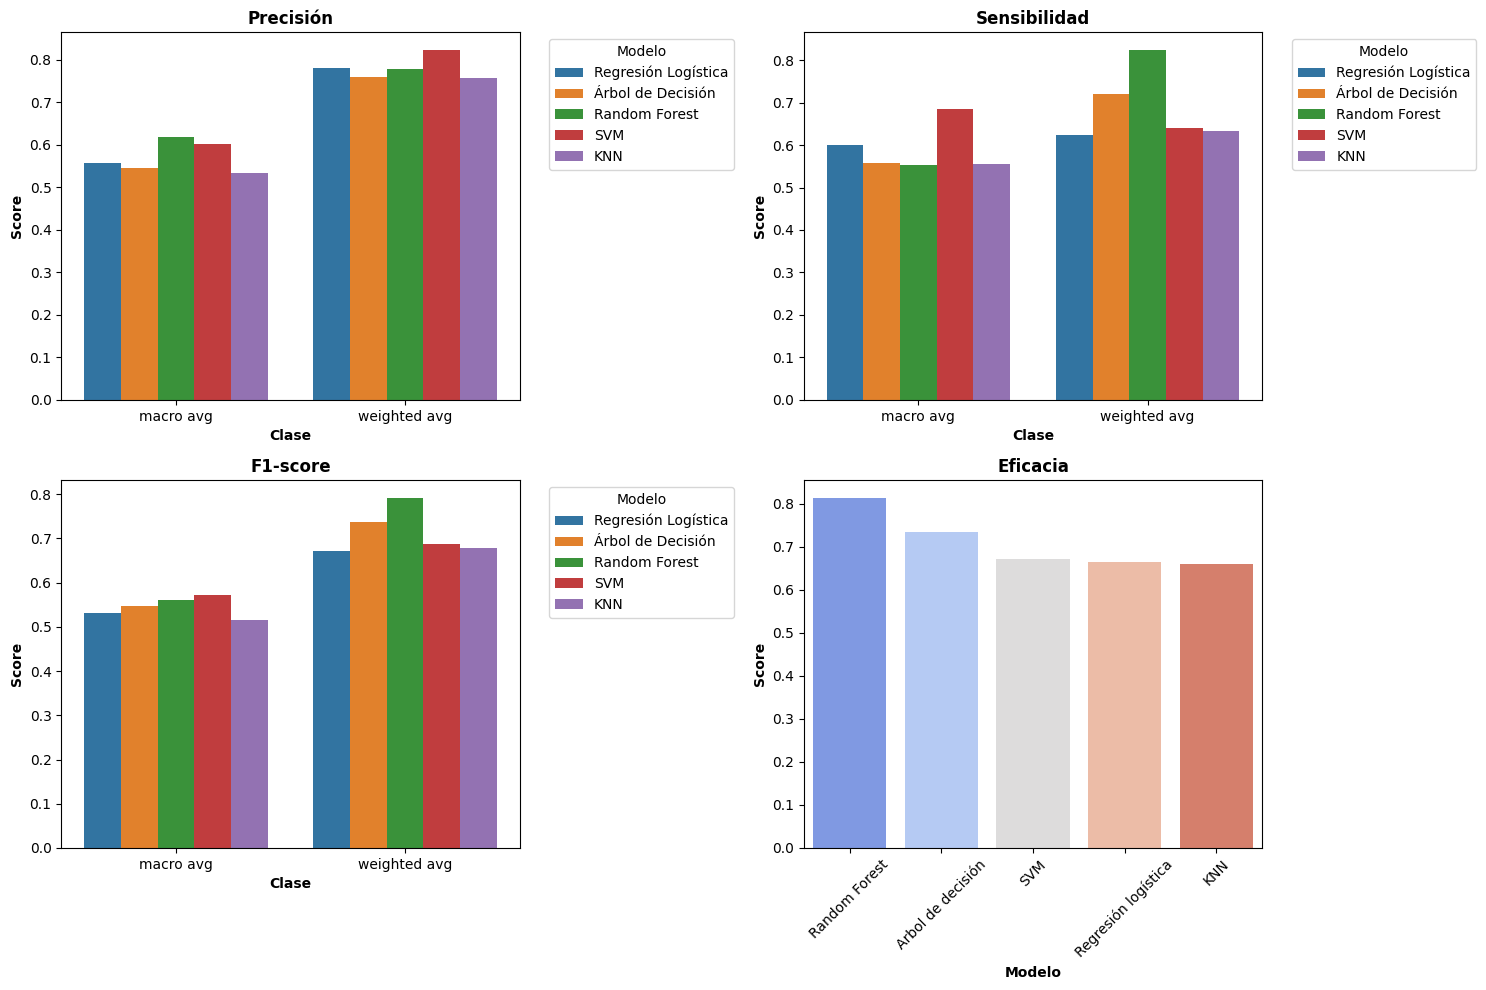

In [43]:
# Filtrar solo las clases 0 y 1 y renombrar
df_filtered_RL = df_report_RL.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_arbol = df_report_arbol.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_forest = df_report_forest.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_svm = df_report_svm.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]
df_filtered_knn = df_report_knn.loc[['macro avg', 'weighted avg'], ['precision', 'recall', 'f1-score']]

# Añadir una columna para identificar el modelo
df_filtered_RL['Modelo'] = 'Regresión Logística'
df_filtered_arbol['Modelo'] = 'Árbol de Decisión'
df_filtered_forest['Modelo'] = 'Random Forest'
df_filtered_svm['Modelo'] = 'SVM'
df_filtered_knn['Modelo'] = 'KNN'

# Combinar todos los DataFrames
df_combined = pd.concat([df_filtered_RL, df_filtered_arbol, df_filtered_forest, df_filtered_svm, df_filtered_knn])

# Resetear el índice para facilitar el gráfico
df_combined.reset_index(inplace=True)

# Crear subplots
plt.figure(figsize=(15, 10))

# Gráfico de barras para la precisión
plt.subplot(2, 2, 1)
sns.barplot(x='index', y='precision', hue='Modelo', data=df_combined)
plt.title('Precisión', fontweight='bold')
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico de barras para la sensibilidad
plt.subplot(2, 2, 2)
sns.barplot(x='index', y='recall', hue='Modelo', data=df_combined)
plt.title('Sensibilidad', fontweight='bold')
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico de barras para el F1-score
plt.subplot(2, 2, 3)
sns.barplot(x='index', y='f1-score', hue='Modelo', data=df_combined)
plt.title('F1-score', fontweight='bold')
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Graficar el barplot comparando las precisiones de los modelos
plt.subplot(2, 2, 4)
sns.barplot(x='Model', 
            y='Accuracy',
            palette='coolwarm',
            data=accuracy_df)
plt.xlabel('Modelo', fontweight='bold')
plt.xticks(rotation=45) 
plt.ylabel('Score', fontweight='bold')
plt.title('Eficacia', fontweight='bold')

# Ajustar el layout
plt.tight_layout()
plt.show()

### Insights>

- Si bien los modelos predicen muy bien la clase 0, el desbalance de la muestra hace que la clase 1 no sea tan bien predicha en terminos relativos. Para estos casos de desbalances de las clases, el promedio ponderado es un buen indicador de rendimiento del modelo, donde se observan rendimientos por encima del 75% en la precision de todos los modelos. En cuanto a la sensibilidad, Random Forest logra el mejor promedio ponderado del 82%, al igual que el F1-score que promedia la precision y la sensibilidad con un 79%. Random Forest logra la mejor eficacia relativa con un 82%. 
- Random Forest logra el mejor rendimiento predictivo con relacion a los otros modelos utilizados. 

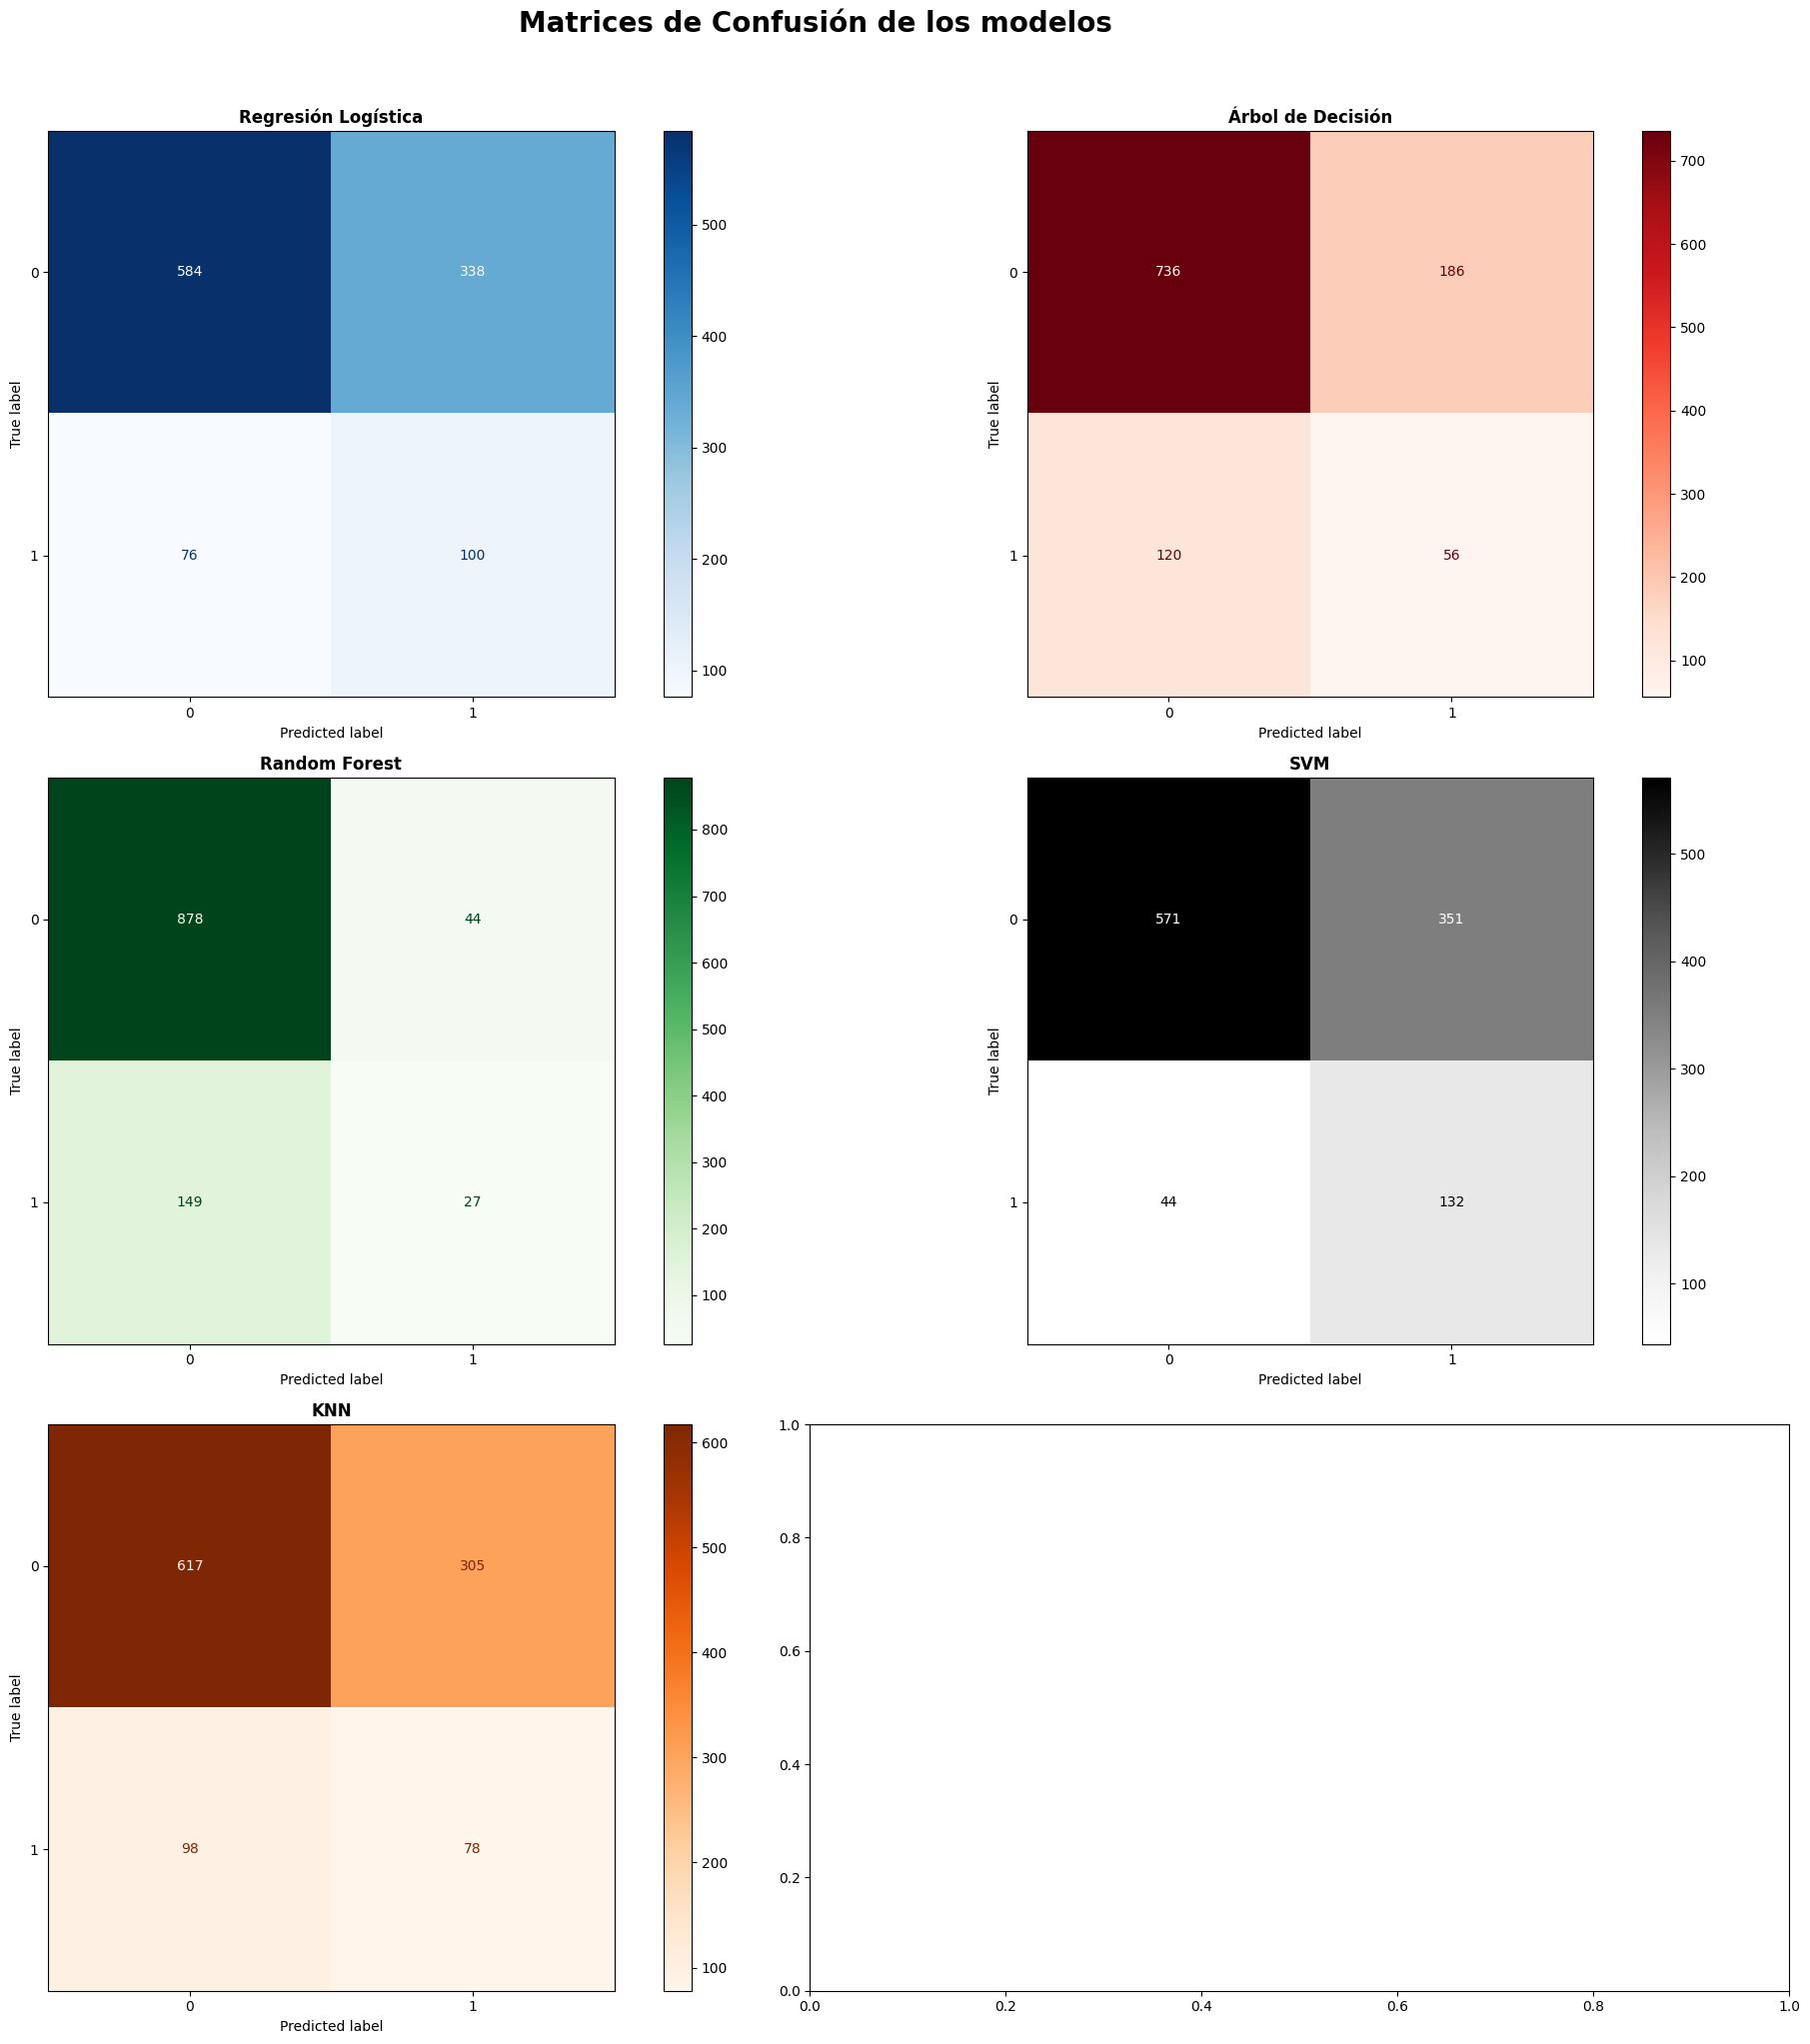

In [44]:
# Crear la matriz de confusión
cm_RL = confusion_matrix(y_test, y_pred)
cm_arbol = confusion_matrix(y_test, y_pred_tree)
cm_RF = confusion_matrix(y_test, y_pred_forest)
cm_SVM = confusion_matrix(y_test, y_pred_svm)
cm_KNN = confusion_matrix(y_test, y_pred_knn)

# Mostrar las matrices de confusión
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Regresión logística
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RL)
disp.plot(cmap=plt.cm.Blues, ax=axes[0, 0])
axes[0, 0].set_title('Regresión Logística', fontweight='bold')

# Árbol de decisión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_arbol)
disp.plot(cmap=plt.cm.Reds, ax=axes[0, 1])
axes[0, 1].set_title('Árbol de Decisión', fontweight='bold')

# Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp.plot(cmap=plt.cm.Greens, ax=axes[1, 0])
axes[1, 0].set_title('Random Forest', fontweight='bold')

# SVM
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp.plot(cmap=plt.cm.Greys, ax=axes[1, 1])
axes[1, 1].set_title('SVM', fontweight='bold')

# KNN
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot(cmap=plt.cm.Oranges, ax=axes[2, 0])
axes[2, 0].set_title('KNN', fontweight='bold')

plt.suptitle('Matrices de Confusión de los modelos', fontsize=20, fontweight='bold', y=1.02)

# Ajustar el layout
plt.tight_layout()
plt.show()

### Insights:

Las matrices de confusion creo que aportan una informacion interesante desde lo estrictamente medico. El objetivo de estos modelos es predecir el desarrollo de ECV, con el objetivo de tomar medidas terapeuticas e higienico - dieteticas con los pacientes con perfil de riesgo. En este sentido, lo eticamente peligroso seria que el modelo prediga que no tienen riesgo los pacientes que en realidad si lo tienen. Por eso estas matrices de confusion aportan un muy buen dato, mas alla de los scores de eficacia, rendimiento y sensibilidad presentados anteriormente. Por ejemplo, si bien Random Forest mostro el mejor rendimiento en terminos generales y relativos, se observa que da 149 falsos negativos, y solo 27 verdaderos positivos. Es decir, que de 1098 unidades de analisis (que es el 30% de la muestra total que se utilizo para testear los modelos), a 149 pacientes con riesgo el modelo les dira que no tienen riesgo, y solo a 27 que si lo tienen. con lo cual no se les daria tratamiento alguno. SVM en cambio solo 44 pacientes con riesgo recibiran un falso negativo, mientras que 132 recibiran un screening de riesgo de ECV acertado, pero 351 pacientes recibiran un falso positivo, otorgando tratamiento a pacientes que no lo requeririan e incrementando asi el costo en salud de manera ineficiente. Algo similar a SVM ocurre con el modelo de Regresion Logistica. 

Como conclusion, es importante poder seguir testeando el dataset, ajustar hiperparametros, revisar los subdatasets de entrenamiento y prueba y revisar las estrategias de sobremuestreo para tratar el desbalanceo de las clases. Random Forest presenta los mejores scores de rendimiento general y relativo. Las matrices de confusion son un buen recurso de informacion para revisar aspectos medicos eticos de las predicciones. 